In [29]:
# Libraries: Standard ones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Library for boxplots
import seaborn as sns

# K-means function
from sklearn.cluster import KMeans

# Functions for silhouette
from sklearn.metrics import silhouette_samples, silhouette_score

# Function to standardize the data 
from sklearn.preprocessing import scale

# Functions for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

#for map 
import folium
from folium.plugins import FastMarkerCluster
from folium.vector_layers import CircleMarker
import branca.colormap as cm

In [13]:
### The first step is to visualize the data in order to understand it. Let's show a table.
temperature=pd.read_csv("temperat.csv", sep=";")
temperature=temperature.rename(columns={'Unnamed: 0': 'Ville'}) # renaming the first column
print(temperature)


            Ville  Janvier  Fevrier  Mars  Avril   Mai  Juin  Juillet  Aout  \
0       Amsterdam      2.9      2.5   5.7    8.2  12.5  14.8     17.1  17.1   
1         Athenes      9.1      9.7  11.7   15.4  20.1  24.5     27.4  27.2   
2          Berlin     -0.2      0.1   4.4    8.2  13.8  16.0     18.3  18.0   
3       Bruxelles      3.3      3.3   6.7    8.9  12.8  15.6     17.8  17.8   
4        Budapest     -1.1      0.8   5.5   11.6  17.0  20.2     22.0  21.3   
5      Copenhague     -0.4     -0.4   1.3    5.8  11.1  15.4     17.1  16.6   
6          Dublin      4.8      5.0   5.9    7.8  10.4  13.3     15.0  14.6   
7        Helsinki     -5.8     -6.2  -2.7    3.1  10.2  14.0     17.2  14.9   
8            Kiev     -5.9     -5.0  -0.3    7.4  14.3  17.8     19.4  18.5   
9        Cracovie     -3.7     -2.0   1.9    7.9  13.2  16.9     18.4  17.6   
10       Lisbonne     10.5     11.3  12.8   14.5  16.7  19.4     21.5  21.9   
11        Londres      3.4      4.2   5.5    8.3  11

,Janvier,Fevrier,Mars,Avril,Mai,Juin,Juillet,Aout,Septembre,Octobre,Novembre,Decembre,Moyenne,Amplitude,Latitude,Longitude
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,1.345714,2.217143,5.228571,9.282857,13.911429,17.414286,19.622857,18.980000,15.631429,11.002857,6.065714,2.880000,10.265714,18.317143,48.980000,10.590286
std,5.502157,5.498956,4.863040,3.806456,3.273582,3.320271,3.574673,3.727939,4.109728,4.323226,4.566820,4.967411,3.963061,4.505649,7.199869,12.362187
min,-9.300000,-7.900000,-3.700000,2.900000,6.500000,9.300000,11.100000,10.600000,7.900000,4.500000,-1.100000,-6.000000,4.500000,10.200000,37.400000,-21.600000
25%,-1.550000,-0.150000,1.600000,7.250000,12.150000,15.400000,17.300000,16.650000,13.000000,8.650000,3.200000,0.250000,7.750000,14.900000,43.900000,3.200000
50%,0.200000,1.900000,5.400000,8.900000,13.800000,16.900000,18.900000,18.300000,14.800000,10.200000,5.100000,1.700000,9.700000,18.500000,50.000000,9.400000
75%,4.900000,5.800000,8.500000,12.050000,16.350000,19.800000,21.750000,21.600000,18.250000,13.300000,7.900000,5.400000,12.650000,21.450000,53.350000,18.650000
max,10.700000,11.800000,14.100000,16.900000,20.900000,24.500000,27.400000,27.200000,24.300000,19.400000,14.900000,12.000000,18.200000,27.600000,64.100000,37.600000


In [14]:
### The second step is to draw some statistics from the data.
temperature.describe()

,Janvier,Fevrier,Mars,Avril,Mai,Juin,Juillet,Aout,Septembre,Octobre,Novembre,Decembre,Moyenne,Amplitude,Latitude,Longitude
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,1.345714,2.217143,5.228571,9.282857,13.911429,17.414286,19.622857,18.980000,15.631429,11.002857,6.065714,2.880000,10.265714,18.317143,48.980000,10.590286
std,5.502157,5.498956,4.863040,3.806456,3.273582,3.320271,3.574673,3.727939,4.109728,4.323226,4.566820,4.967411,3.963061,4.505649,7.199869,12.362187
min,-9.300000,-7.900000,-3.700000,2.900000,6.500000,9.300000,11.100000,10.600000,7.900000,4.500000,-1.100000,-6.000000,4.500000,10.200000,37.400000,-21.600000
25%,-1.550000,-0.150000,1.600000,7.250000,12.150000,15.400000,17.300000,16.650000,13.000000,8.650000,3.200000,0.250000,7.750000,14.900000,43.900000,3.200000
50%,0.200000,1.900000,5.400000,8.900000,13.800000,16.900000,18.900000,18.300000,14.800000,10.200000,5.100000,1.700000,9.700000,18.500000,50.000000,9.400000
75%,4.900000,5.800000,8.500000,12.050000,16.350000,19.800000,21.750000,21.600000,18.250000,13.300000,7.900000,5.400000,12.650000,21.450000,53.350000,18.650000
max,10.700000,11.800000,14.100000,16.900000,20.900000,24.500000,27.400000,27.200000,24.300000,19.400000,14.900000,12.000000,18.200000,27.600000,64.100000,37.600000


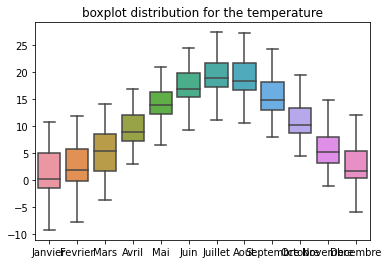

In [15]:
### Let's present these results on a boxplot using Seasborne, as there is still a lot of data. 
plt.figure()
plt.title("boxplot distribution for the temperature")
temperature_boxplot=sns.boxplot(data=temperature.drop(["Moyenne", "Amplitude","Latitude","Longitude","Region"], axis=1))

What value do you want to visualize ( Amplitude, Moyenne, etc) ? 
Moyenne


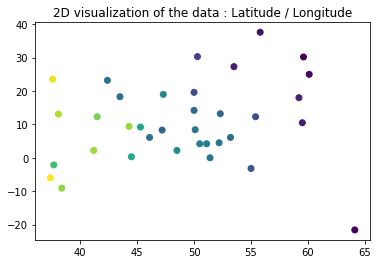

In [24]:
### Represented like this, we can't extract clusters, so let's represent it differently
value_to_visualize = input("What value do you want to visualize ( Amplitude, Moyenne, etc) ? \n")
plt.figure()
plt.title("2D visualization of the data : Latitude / Longitude")
plt.scatter(temperature["Latitude"], temperature["Longitude"],c=temperature[value_to_visualize]) # We prese


What value do you want to visualize ( Amplitude, Moyenne, etc) ? 
Amplitude


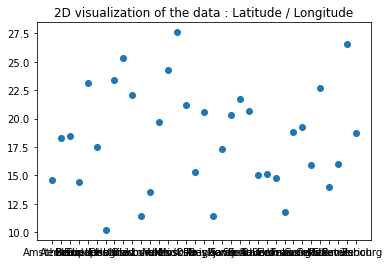

In [32]:
### Let's now present the temperature according to the city
value_to_visualize = input("What value do you want to visualize ( Amplitude, Moyenne, etc) ? \n")
plt.figure()
plt.title("2D visualization of the data : Latitude / Longitude")
plt.scatter(temperature["Ville"], temperature[value_to_visualize])

In [ ]:
We will now 